## Exercises

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

- pip install vega_datasets

You can use this library like so:

- from vega_datasets import data
- data.sf_temps()

Use the dataset for the exercises below:

- from vega_datasets import data
- data.sf_temps()

- Resample by the day and take the average temperature. Visualize the average temperature over time.
- Write the code necessary to visualize the minimum temperature over time.
- Write the code necessary to visualize the maximum temperature over time.
- Which month is the coldest, on average?
- Which month has the highest average temperature?

- Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vega_datasets import data

In [2]:
df = data.sf_temps()

In [3]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
df = df.set_index('date')

In [6]:
df = df.sort_index()

<Figure size 1152x648 with 0 Axes>

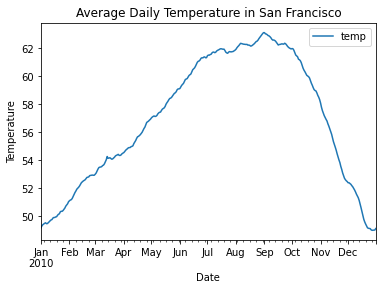

In [7]:
plt.figure(figsize=[16,9])
df.resample('D').mean().plot()
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Average Daily Temperature in San Francisco')
plt.show()

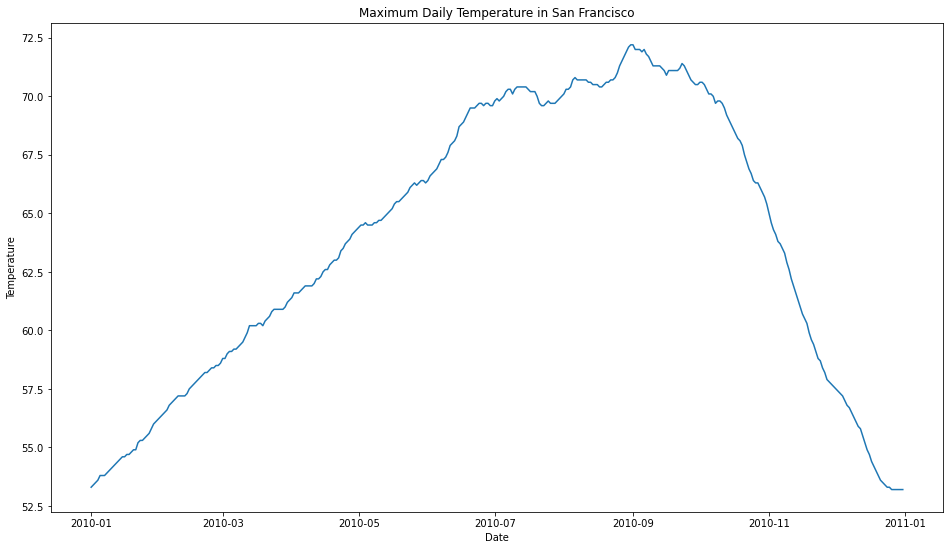

In [8]:
plt.figure(figsize=[16,9])
plt.plot(df.resample('D').max())
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Maximum Daily Temperature in San Francisco')
plt.show()

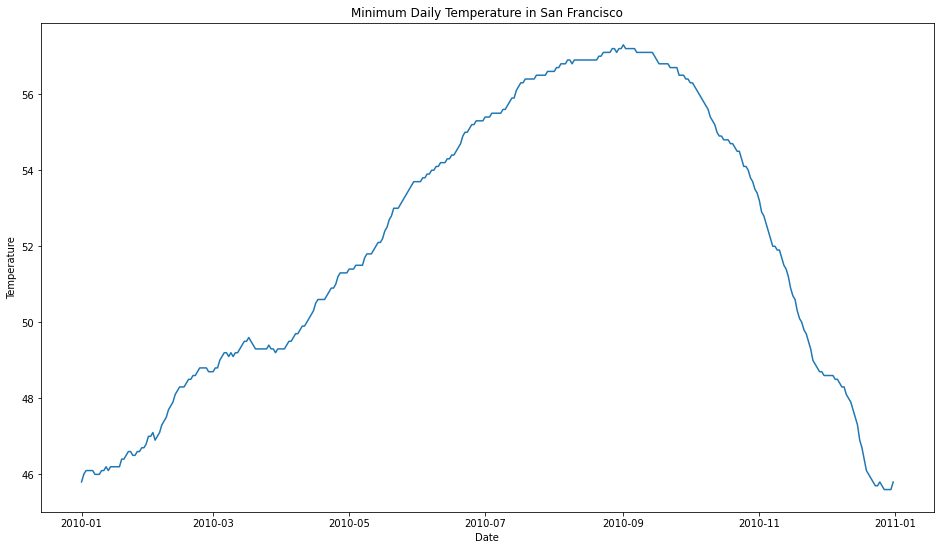

In [9]:
plt.figure(figsize=[16,9])
plt.plot(df.resample('D').min())
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Minimum Daily Temperature in San Francisco')
plt.show()

In [10]:
df['month'] = df.index.month_name()

In [11]:
df.groupby('month').mean('temp')

,temp
month,
April,55.633056
August,62.405376
December,50.498253
February,52.243899
January,49.984140
July,61.765457
June,60.444722
March,53.956528
May,57.970968


- January is the coldest month on average.
- September has the highest average temperature.

In [12]:
df2 = df.resample('D').agg(['min','max'])
df2

temp           month          
             min   max       min       max
date                                      
2010-01-01  45.8  53.3   January   January
2010-01-02  46.0  53.4   January   January
2010-01-03  46.1  53.5   January   January
2010-01-04  46.1  53.6   January   January
2010-01-05  46.1  53.8   January   January
...          ...   ...       ...       ...
2010-12-27  45.6  53.2  December  December
2010-12-28  45.6  53.2  December  December
2010-12-29  45.6  53.2  December  December
2010-12-30  45.6  53.2  December  December
2010-12-31  45.8  53.2  December  December

[365 rows x 4 columns]

In [13]:
df2['change'] = df2.temp['max'] - df2.temp['min']

In [14]:
df2.change.groupby(df2.index.month).max()

date
1      9.3
2      9.9
3     12.0
4     13.0
5     13.1
6     14.8
7     14.8
8     15.0
9     14.9
10    14.4
11    11.8
12     8.9
Name: change, dtype: float64

- August had the highest amount of daily temperature variability.

ConversionError: Failed to convert value(s) to axis units: array(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'March', 'March',
       'March', 'March', 'March', 'March', 'March', 'March', 'March',
       'March', 'March', 'March', 'March', 'March', 'March', 'March',
       'March', 'March', 'March', 'March', 'March', 'March', 'March',
       'March', 'March', 'March', 'March', 'March', 'March', 'March',
       'March', 'April', 'April', 'April', 'April', 'April', 'April',
       'April', 'April', 'April', 'April', 'April', 'April', 'April',
       'April', 'April', 'April', 'April', 'April', 'April', 'April',
       'April', 'April', 'April', 'April', 'April', 'April', 'April',
       'April', 'April', 'April', 'May', 'May', 'May', 'May', 'May',
       'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May',
       'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May',
       'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'June',
       'June', 'June', 'June', 'June', 'June', 'June', 'June', 'June',
       'June', 'June', 'June', 'June', 'June', 'June', 'June', 'June',
       'June', 'June', 'June', 'June', 'June', 'June', 'June', 'June',
       'June', 'June', 'June', 'June', 'June', 'July', 'July', 'July',
       'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July',
       'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July',
       'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July',
       'July', 'July', 'July', 'July', 'August', 'August', 'August',
       'August', 'August', 'August', 'August', 'August', 'August',
       'August', 'August', 'August', 'August', 'August', 'August',
       'August', 'August', 'August', 'August', 'August', 'August',
       'August', 'August', 'August', 'August', 'August', 'August',
       'August', 'August', 'August', 'August', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'October', 'October',
       'October', 'October', 'October', 'October', 'October', 'October',
       'October', 'October', 'October', 'October', 'October', 'October',
       'October', 'October', 'October', 'October', 'October', 'October',
       'October', 'October', 'October', 'October', 'October', 'October',
       'October', 'October', 'October', 'October', 'October', 'November',
       'November', 'November', 'November', 'November', 'November',
       'November', 'November', 'November', 'November', 'November',
       'November', 'November', 'November', 'November', 'November',
       'November', 'November', 'November', 'November', 'November',
       'November', 'November', 'November', 'November', 'November',
       'November', 'November', 'November', 'November', 'December',
       'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December', 'December'],
      dtype=object)

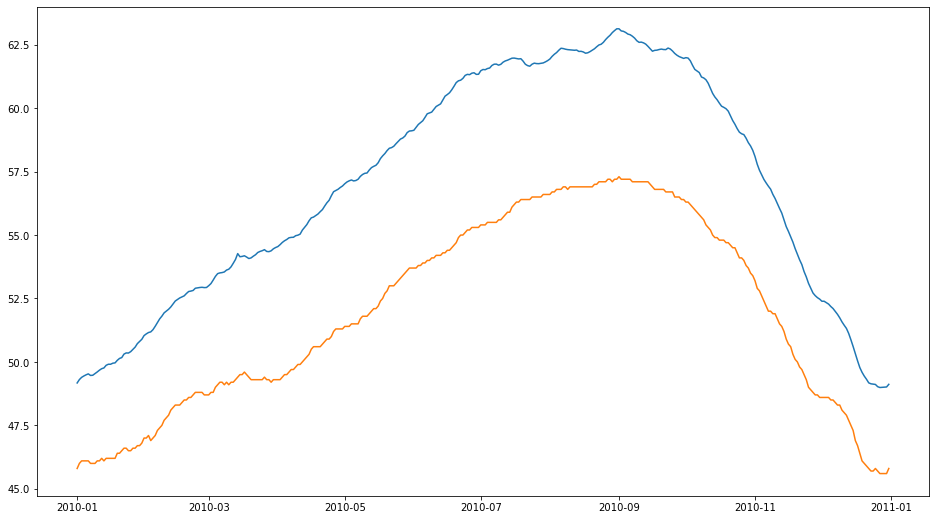

In [15]:
plt.figure(figsize=[16,9])
plt.plot(df.resample('D').mean(), label='Avg')
plt.plot(df.resample('D').min(), label='Min')
plt.plot(df.resample('D').max(), label='Max')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.title('Daily Temperature in 2010')
plt.show()

Use the dataset to answer the following questions:

- from vega_datasets import data
- data.seattle_weather()

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?


In [ ]:
seattle = data.seattle_weather()

In [ ]:
seattle.head()

In [ ]:
seattle = seattle.set_index('date')

In [ ]:
seattle = seattle.sort_index()

In [ ]:
seattle.index[seattle.precipitation==seattle.precipitation.max()]

In [ ]:
plt.figure(figsize=[16,9])
plt.plot(seattle.precipitation.resample('M').sum())
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Monthly Precipitation in Seattle')
plt.show()

In [ ]:
plt.figure(figsize=[16,9])
plt.plot(seattle.wind.resample('M').sum())
plt.xlabel('Date')
plt.ylabel('Wind')
plt.title('Monthly Total Amount of Wind in Seattle')
plt.show()

- December 2015 was the windiest.

In [ ]:
plt.figure(figsize=[16,9])
plt.plot(seattle.wind.resample('M').max(), label='Monthly')
plt.plot(seattle.wind.resample('Y').max(), label='Yearly')
plt.xlabel('Date')
plt.ylabel('Wind')
plt.title('Amount of Wind in Seattle')
plt.legend()
plt.show()

In [ ]:
seattle

In [ ]:
seattle.index.year[seattle['weather']=='sun'].value_counts()

- 2014 was the sunniest year.

In [ ]:
seattle.index.month[seattle['weather']=='rain'].value_counts()

- February has the most rainy days.

In [ ]:
seattle.index.month[seattle['precipitation']>0].value_counts()

- December has the most days with non-zero precipitation.

Use the dataset to answer the following questions:

- data.flights_20k()
- Convert any negative delays to 0.
- Which hour of the day has the highest average delay?
- Does the day of the week make a difference in the delay amount?
- Does the month make a difference in the delay amount?

In [ ]:
flights = data.flights_20k()

In [ ]:
flights = flights.set_index('date').sort_index()

In [ ]:
flights.head()

In [ ]:
flights[flights.delay < 0]

In [ ]:
flights.delay.loc[flights.delay < 0] = 0

In [ ]:
flights

In [ ]:
flights['hour'] = flights.index.hour
flights.head()

In [ ]:
flights.groupby('hour').mean().delay.idxmax()

In [ ]:
flights.groupby('hour').mean().delay.max()

In [ ]:
flights['weekday'] = flights.index.day_name()
flights.head()

In [ ]:
flights.groupby('weekday').mean().delay.sort_values()

In [ ]:
flights['month'] = flights.index.month_name()
flights.head()

In [ ]:
flights.groupby('month').mean().delay

### Bonus

- from vega_datasets import data
- data.iowa_electricity()

- For each row, calculate the percentage of the year's total that energy source provided.
- Lineplot of generation over time, color by source
- Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
- Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
- Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
    - express each number as a % of the year's total

Use the sf_temps dataset

- Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
- How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
- Create pretty labels for time plots
- Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

Explore the birdstrikes dataset.

- df = data.birdstrikes()

In [63]:
df = data.iowa_electricity()

In [64]:
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [66]:
df = df.rename(columns={'year':'date'})

In [67]:
df = df.set_index('date').sort_index()

In [68]:
df.head()

,source,net_generation
date,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


In [69]:
df.index.year.nunique()

17

In [70]:
df['year']= df.index.year

In [71]:
df.groupby('year').net_generation.sum()

year
2001    40651
2002    42528
2003    42107
2004    43236
2005    44145
2006    45473
2007    49778
2008    53086
2009    51859
2010    57509
2011    56371
2012    56675
2013    56670
2014    56854
2015    56653
2016    54381
2017    56476
Name: net_generation, dtype: int64